In [193]:
# Import dependencies
import timeit
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [194]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [195]:
# Import Data
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
x = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.DataFrame(cancer.target, columns=['diagnosis'])['diagnosis']
# print('Number of Samples: ', y.shape[0])
# print('Number of Attributes: ', x.shape[1])
# print(y.shape)
# y.head()

In [196]:
# Convert Chrun into binary numeric variable
y.replace(to_replace=1, value='B', inplace=True)
y.replace(to_replace=0, value='M', inplace=True)

### Data Preprocessing

In [197]:
# #Display Data types of each column
x.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [13]:
list = ['radius error', 'texture error','perimeter error','area error','smoothness error', 'compactness error',\
       'concavity error', 'concave points error', 'symmetry error','fractal dimension error']
x = x.drop(list,axis=1)
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign:  212
Number of Malignant :  357


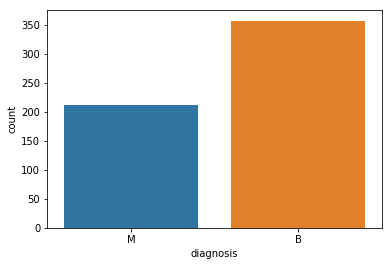

In [14]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
M, B = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

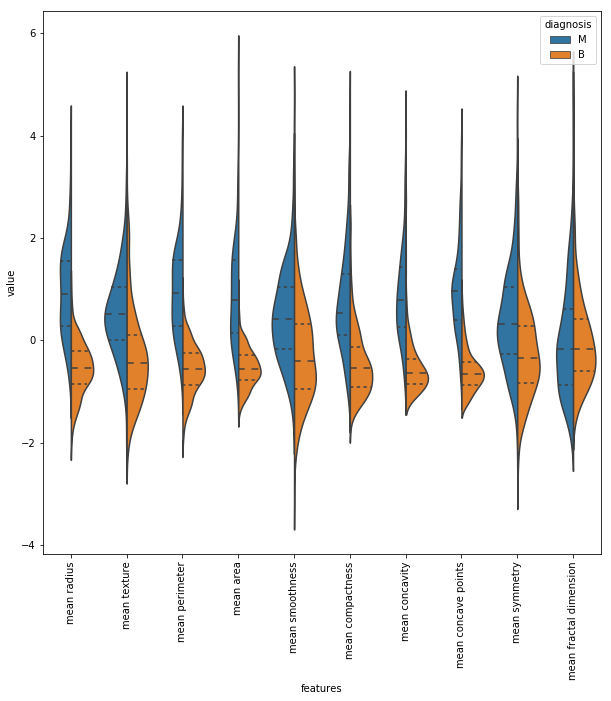

In [15]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

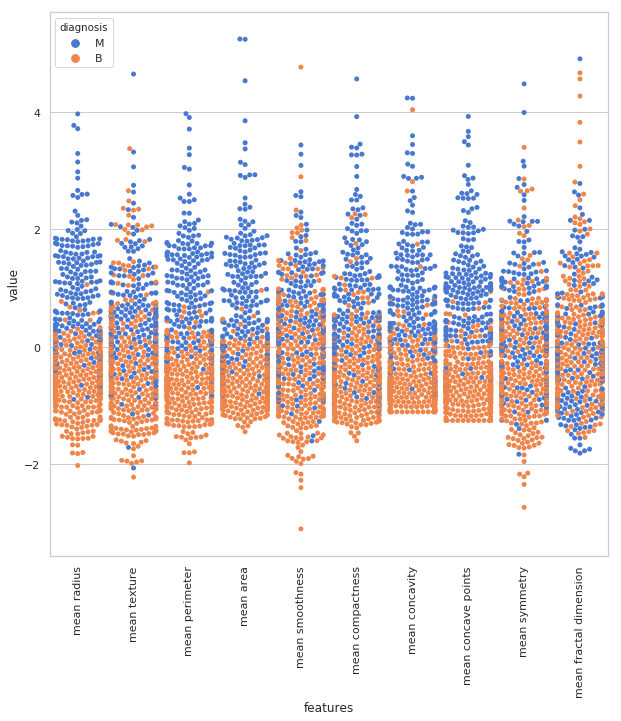

In [16]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

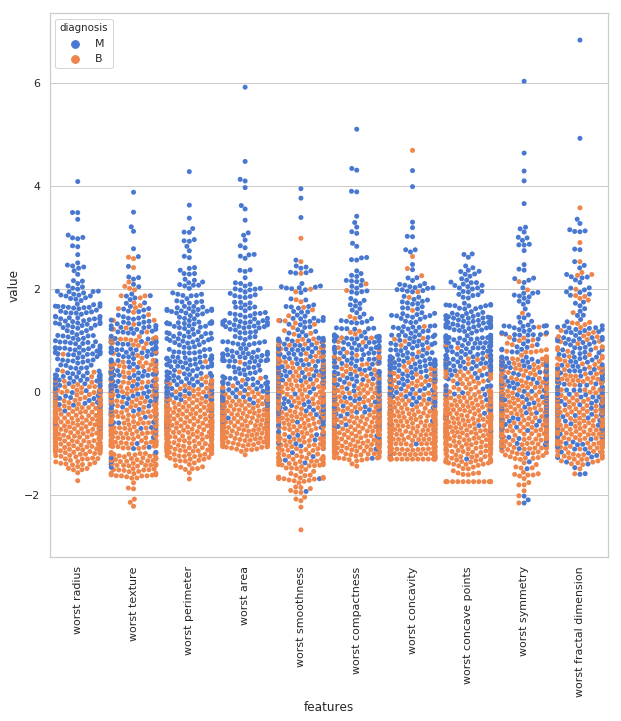

In [17]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

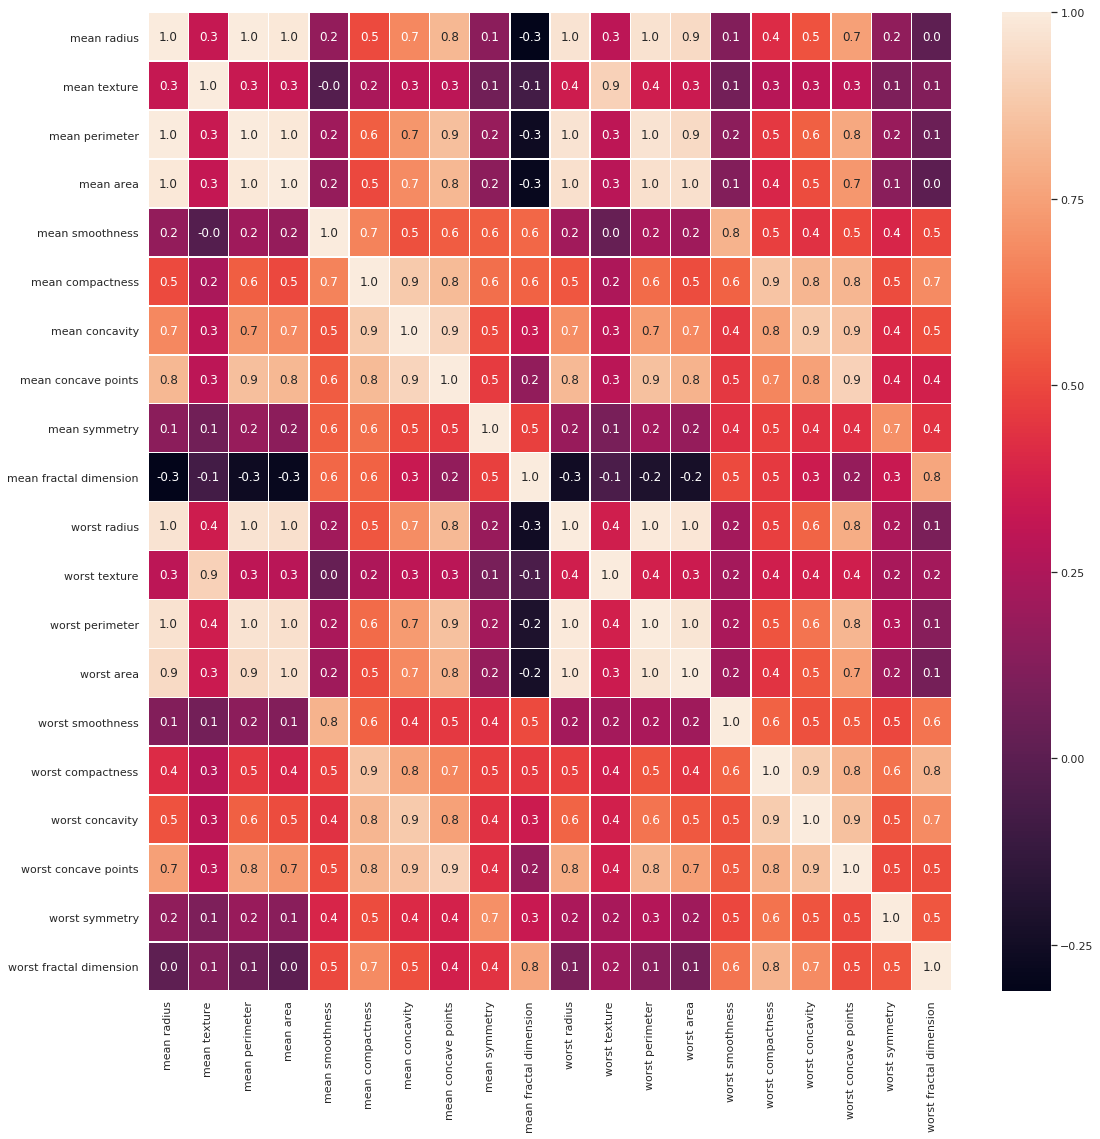

In [18]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [19]:
drop_list1 = ['mean perimeter','mean radius', 'mean compactness','mean concave points',\
              'worst radius','worst perimeter','worst compactness','worst concave points',\
              'worst texture','worst area','worst concavity']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

,mean texture,mean area,mean smoothness,mean concavity,mean symmetry,mean fractal dimension,worst smoothness,worst symmetry,worst fractal dimension
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.1622,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.1238,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.1444,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,0.2098,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.1374,0.2364,0.07678


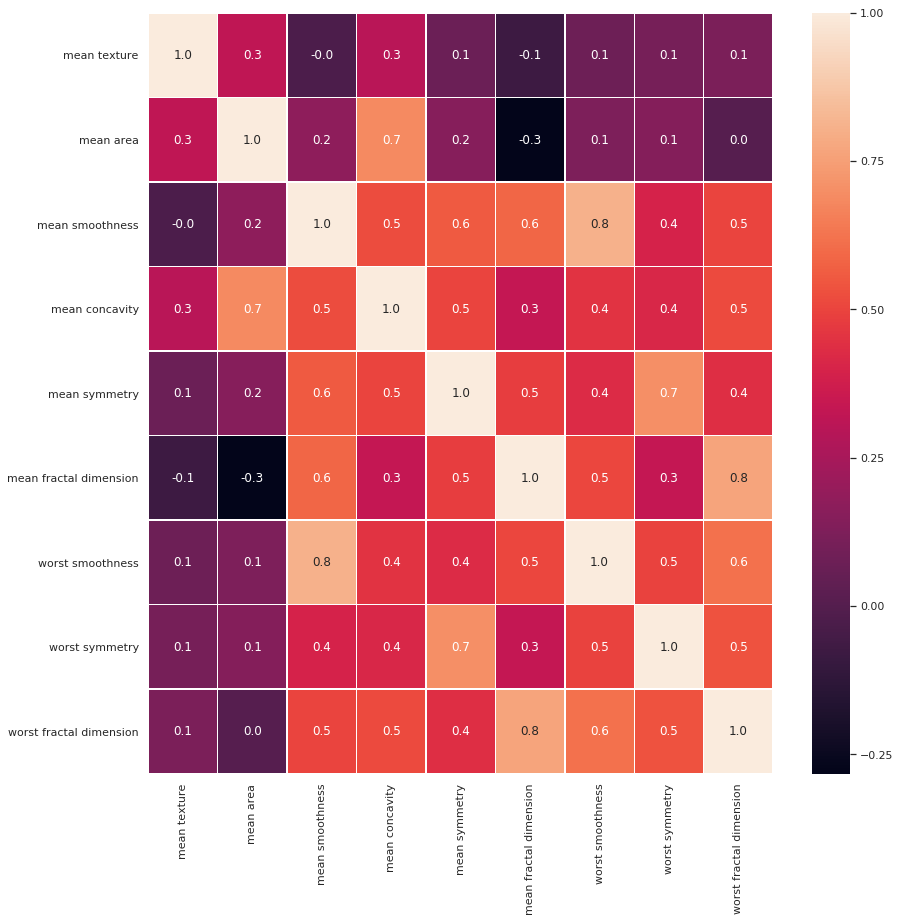

In [20]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [21]:
x_1.head()

,mean texture,mean area,mean smoothness,mean concavity,mean symmetry,mean fractal dimension,worst smoothness,worst symmetry,worst fractal dimension
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.1622,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.1238,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.1444,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,0.2098,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.1374,0.2364,0.07678


In [22]:
# Convert Chrun into binary numeric variable
y.replace(to_replace='B', value=1, inplace=True)
y.replace(to_replace='M', value=0, inplace=True)

In [23]:
#Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(x_1, y, test_size=.2, random_state=101)

In [24]:
# Scale all features
from sklearn.preprocessing import StandardScaler

features = X_train.columns.values
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_train.columns = features
X_test = pd.DataFrame(scaler.transform(X_test))
X_test.columns = features

X_train.head()


,mean texture,mean area,mean smoothness,mean concavity,mean symmetry,mean fractal dimension,worst smoothness,worst symmetry,worst fractal dimension
0,0.285621,-0.105292,-0.499345,-0.478905,-1.132405,-0.400089,-0.760713,-0.599638,-0.322858
1,-1.405993,-0.552634,0.723925,-0.753538,0.221538,0.241075,0.462929,0.885839,0.435180
2,-0.438689,-0.316582,-1.713417,-0.569330,-1.201188,-0.919127,-0.992937,-0.229460,-0.684612
3,-0.613925,0.164874,-0.538258,-0.169570,-0.813830,-0.432009,0.748743,0.800047,0.708688
4,0.192162,0.076561,0.162876,-0.188849,-0.842791,-0.520828,0.628165,0.186791,-0.126634


### Predictive Models - Parameter Tuning

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib

def grid_search(estimator, param_grid, X_train, y_train):
    grid = GridSearchCV(estimator, param_grid, cv=10, scoring='f1', return_train_score=False, n_jobs=-1)
    grid.fit(X_train, y_train)
    #print(pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']])

    #print()
    # examine the best model
    print('Best_score = ', grid.best_score_)
    print('Best_params = ', grid.best_params_)
    return grid

In [26]:
# from sklearn.model_selection import RandomizedSearchCV

# def rand_grid_search(estimator, param_grid, X_train, y_train):
#     grid = RandomizedSearchCV(estimator, param_grid, cv=10, scoring='accuracy', return_train_score=False, n_iter=50, n_jobs=-1)
#     grid.fit(X_train, y_train)
#     #print(pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']])

#     #print()
#     # examine the best model
#     print('Best_score = ', grid.best_score_)
#     print('Best_params = ', grid.best_params_)
#     return grid

##### **Decision Tree**

In [27]:
from sklearn.tree import DecisionTreeClassifier

param_grid={
             'criterion': ["gini", "entropy"],
             'max_depth': range(2,21,2),
           }

dtree_grid = grid_search(DecisionTreeClassifier(), param_grid, X_train, y_train)
joblib.dump(dtree_grid, 'dtree_grid.pkl')

Best_score =  0.9526666083064903
Best_params =  {'criterion': 'entropy', 'max_depth': 20}


['dtree_grid.pkl']

##### **Nerual Network**

In [28]:
from sklearn.neural_network import MLPClassifier

param_grid = {
               'solver': ['lbfgs','sgd','adam'],
               'alpha': 10.0 ** -np.arange(1, 5),
               'hidden_layer_sizes':np.arange(2, 12), 
               'random_state':[0,2,4,6,8]
             }

nn_grid = grid_search(MLPClassifier(), param_grid, X_train, y_train)
joblib.dump(nn_grid, 'nn_grid.pkl')

Best_score =  0.9759861171423668
Best_params =  {'random_state': 6, 'hidden_layer_sizes': 10, 'solver': 'adam', 'alpha': 0.1}


['nn_grid.pkl']

##### **Boosting**

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
               'loss': ['deviance', 'exponential'],    
               'learning_rate': [0.05, 0.1, 0.2],
               'max_depth': range(2,20,2),
               'min_samples_split': [2,5,10,15]
             }

gb_grid = grid_search(GradientBoostingClassifier(random_state = 0), param_grid, X_train, y_train)
joblib.dump(gb_grid, 'gb_grid.pkl')

Best_score =  0.978076127044393
Best_params =  {'min_samples_split': 15, 'loss': 'deviance', 'learning_rate': 0.2, 'max_depth': 4}


['gb_grid.pkl']

##### **Support Vector Machine**

In [31]:
from sklearn.svm import SVC

param_grid = [
               {
                 'C': [1, 10, 100, 1000], 
                 'kernel': ['linear']
               },
               {
                 'C': [1, 10, 100, 1000], 
                 'gamma': [0.001, 0.0001], 
                 'kernel': ['rbf']
               },
             ]

svc_grid = grid_search(SVC(), param_grid, X_train, y_train)
joblib.dump(svc_grid, 'svc_grid.pkl')

Best_score =  0.9757766656794165
Best_params =  {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


['svc_grid.pkl']

##### **K Nearest Neighbors**

In [32]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
               'n_neighbors': range(1, 31),    
               'weights': ['uniform', 'distance']
             }

knn_grid = grid_search(KNeighborsClassifier(), param_grid, X_train, y_train)
joblib.dump(knn_grid, 'knn_grid.pkl')

Best_score =  0.967471072967044
Best_params =  {'weights': 'uniform', 'n_neighbors': 10}


['knn_grid.pkl']

### Predictive Models - Learning Curves

In [33]:
#Load trained models
dtree_grid = joblib.load('dtree_grid.pkl') 
nn_grid = joblib.load('nn_grid.pkl') 
gb_grid = joblib.load('gb_grid.pkl') 
svc_grid = joblib.load('svc_grid.pkl') 
knn_grid = joblib.load('knn_grid.pkl') 

In [93]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, estimator_name, X, y, ylim=None, cv=10, n_jobs=-1, train_sizes=[19,50,100,200,300,400]):
    plt.figure()
    param_str = ', '.join('\'{}\': {}'.format(key, val) for key, val in estimator.best_params_.items())
    plt.title(estimator_name + ' ' + "Learning Curves [{}]".format(param_str))
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator.best_estimator_, X, y, cv=cv, scoring='f1', n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.savefig('Learning_curve-{}.png'.format(estimator_name))
    plt.show()
    return plt

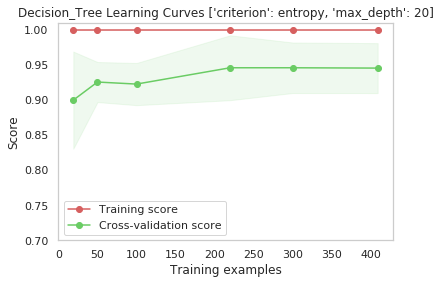

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

In [94]:
#Decision Tree
plot_learning_curve(dtree_grid, 'Decision_Tree', X_train, y_train, (0.7,1.01), train_sizes=[19,50,100,220,300,409])

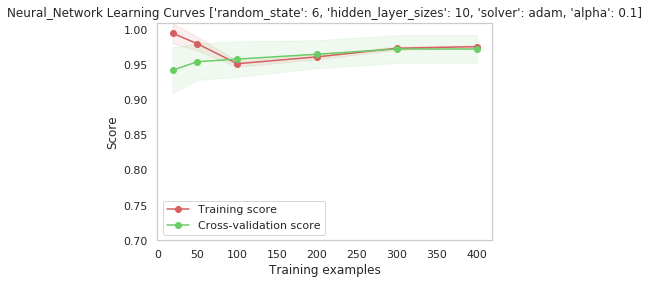

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

In [95]:
#Nueral Network
plot_learning_curve(nn_grid, 'Neural_Network', X_train, y_train, (0.7,1.01), cv=10)

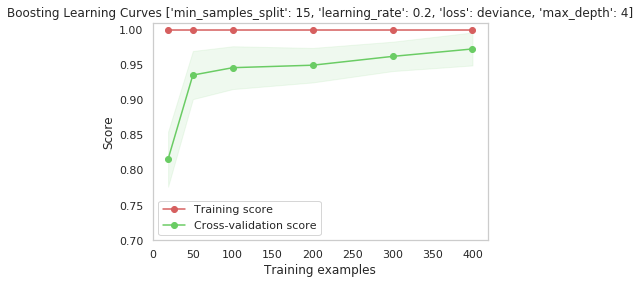

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

In [96]:
#Boosting
plot_learning_curve(gb_grid, 'Boosting', X_train, y_train, (0.7,1.01), cv=10)

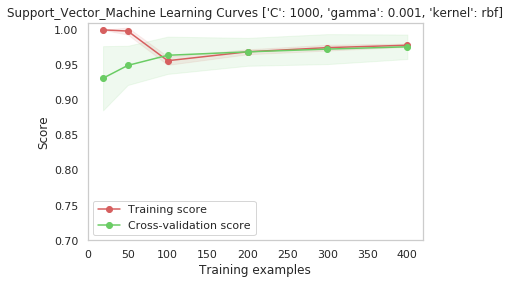

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

In [97]:
#SVM
plot_learning_curve(svc_grid, 'Support_Vector_Machine', X_train, y_train, (0.7,1.01), cv=10)

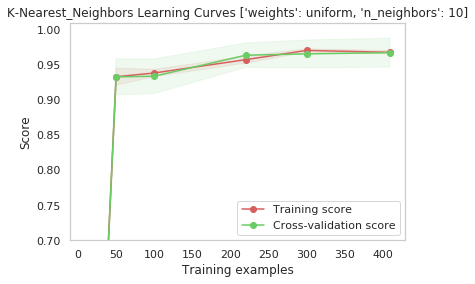

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

In [99]:
#KNN
plot_learning_curve(knn_grid, 'K-Nearest_Neighbors', X_train, y_train, (0.7,1.01), cv=10, train_sizes=[10,50,100,220,300,409])

## Complexity Curves - Hyperparameters

In [122]:
from sklearn.model_selection import validation_curve
def complexity_curve(estimator, title, param_name, param_range, X=X_train,y=y_train):
    train_scores, test_scores = validation_curve(estimator.best_estimator_, X, y, param_name=param_name, param_range=param_range,cv=10, scoring="f1", n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Complexity Curve with " + title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.8, 1.05)

    plt.plot(param_range, train_scores_mean,'o-', label="Training score",
                 color="r")
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.plot(param_range, test_scores_mean,'o-', label="Cross-validation score",
                 color="g")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.legend(loc="lower right")
    plt.savefig('Complexity_curve-{}.png'.format(title))
    plt.show()

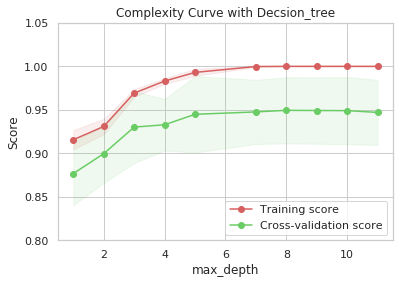

In [123]:
# Decision Tree
complexity_curve(dtree_grid, 'Decsion_tree', 'max_depth', [1,2,3,4,5,7,8,9,10,11])

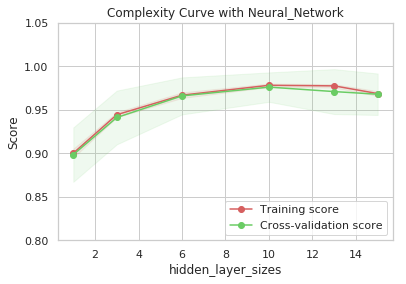

In [124]:
# Neural Network
complexity_curve(nn_grid, 'Neural_Network', 'hidden_layer_sizes', [1,3,6,10,13,15])

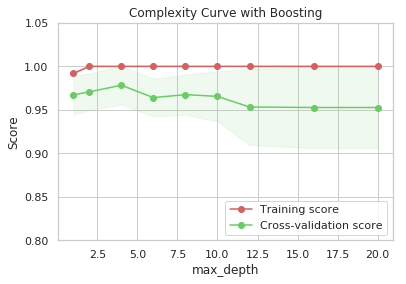

In [125]:
# Boosting
complexity_curve(gb_grid, 'Boosting', 'max_depth', [1,2,4,6,8,10,12,16,20])

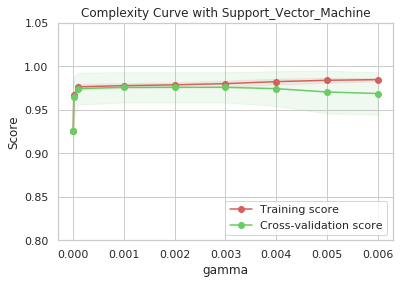

In [132]:
# SVM
complexity_curve(svc_grid, 'Support_Vector_Machine', 'gamma', [.000001,.00001,.0001,.001,.002,.003,.004,.005,.006])

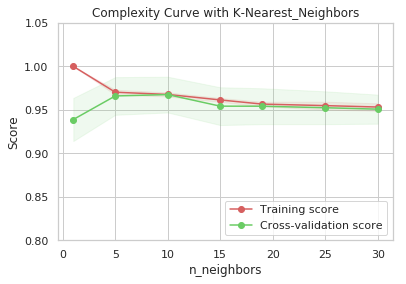

In [134]:
# KNN
complexity_curve(knn_grid, 'K-Nearest_Neighbors', 'n_neighbors', [1,5,10,15,19,25,30])

## Learning Curves - Iterations

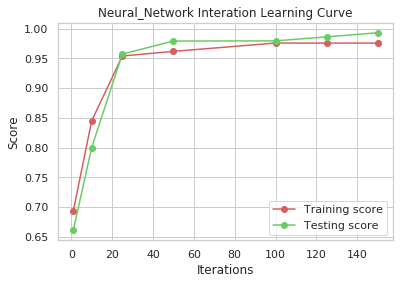

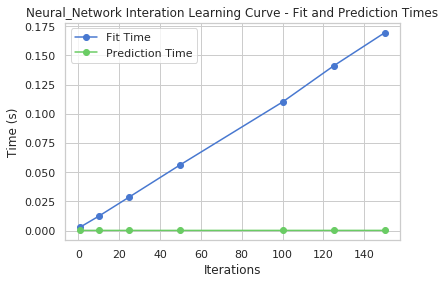

In [192]:
from sklearn.metrics import f1_score

title = 'Neural_Network'
iterations= [1,10,25,50,100,125,150]
fit_times = []
pred_times = []
train_scores = []
test_scores = []

for iteration in iterations: 
    estimator = MLPClassifier(random_state=6,hidden_layer_sizes=10,solver='adam',alpha=0.1, max_iter=iteration)
    start_time = timeit.default_timer()
    estimator.fit(X_train, y_train) 
    fit_times.append(timeit.default_timer() - start_time)

    start_time1 = timeit.default_timer()
    y_pred = estimator.predict(X_test)
    pred_times.append(timeit.default_timer() - start_time1)
    test_scores.append(f1_score(y_test, y_pred))

    y_pred = estimator.predict(X_train)
    train_scores.append(f1_score(y_train, y_pred))


plt.figure(0)
plt.plot(iterations, train_scores,'o-', label="Training score", color="r")
plt.plot(iterations, test_scores,'o-', label="Testing score", color="g")
plt.ylabel('Score')
plt.xlabel('Iterations')
plt.title(title + ' Interation Learning Curve')
plt.legend(loc="best")
plt.savefig('Iteration_Score_curve-{}.png'.format(title))
plt.show()

plt.figure(1)
plt.plot(iterations, fit_times,'o-', label="Fit Time", color="b")
plt.plot(iterations, pred_times,'o-', label="Prediction Time", color="g")
plt.ylabel('Time (s)')
plt.xlabel('Iterations')
plt.title(title + ' Interation Learning Curve - Fit and Prediction Times')
plt.legend(loc="best")
plt.savefig('Iteration_Time_curve-{}.png'.format(title))
plt.show()
    


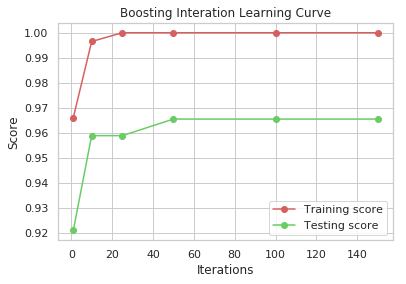

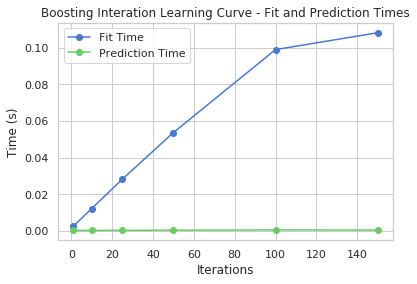

In [190]:
# Boosting
title = 'Boosting'
iterations= [1,10,25,50,100,150]
fit_times = []
pred_times = []
train_scores = []
test_scores = []

for iteration in iterations: 
    estimator = GradientBoostingClassifier(min_samples_split=15, loss='deviance', learning_rate=0.2, max_depth=4, n_estimators=iteration)
    start_time = timeit.default_timer()
    estimator.fit(X_train, y_train) 
    fit_times.append(timeit.default_timer() - start_time)

    start_time1 = timeit.default_timer()
    y_pred = estimator.predict(X_test)
    pred_times.append(timeit.default_timer() - start_time1)
    test_scores.append(f1_score(y_test, y_pred))

    y_pred = estimator.predict(X_train)
    train_scores.append(f1_score(y_train, y_pred))


plt.figure(0)
plt.plot(iterations, train_scores,'o-', label="Training score", color="r")
plt.plot(iterations, test_scores,'o-', label="Testing score", color="g")
plt.ylabel('Score')
plt.xlabel('Iterations')
plt.title(title + ' Interation Learning Curve')
plt.legend(loc="best")
plt.savefig('Iteration_Score_curve-{}.png'.format(title))
plt.show()

plt.figure(1)
plt.plot(iterations, fit_times,'o-', label="Fit Time", color="b")
plt.plot(iterations, pred_times,'o-', label="Prediction Time", color="g")
plt.ylabel('Time (s)')
plt.xlabel('Iterations')
plt.title(title + ' Interation Learning Curve - Fit and Prediction Times')
plt.legend(loc="best")
plt.savefig('Iteration_Time_curve-{}.png'.format(title))
plt.show()


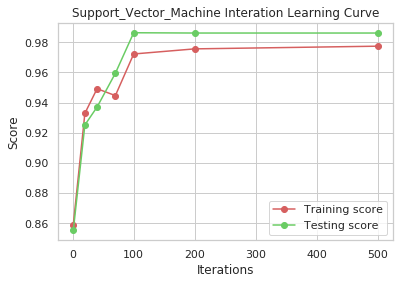

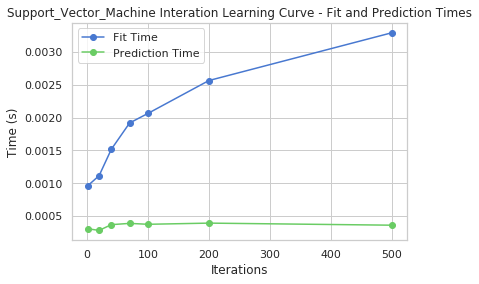

In [152]:
# SVM
title = 'Support_Vector_Machine'
iterations= [1,20,40,70,100,200,500]
fit_times = []
pred_times = []
train_scores = []
test_scores = []

for iteration in iterations: 
    estimator = SVC(C=1000,gamma=0.001,kernel='rbf', max_iter=iteration)
    start_time = timeit.default_timer()
    estimator.fit(X_train, y_train) 
    fit_times.append(timeit.default_timer() - start_time)

    start_time1 = timeit.default_timer()
    y_pred = estimator.predict(X_test)
    pred_times.append(timeit.default_timer() - start_time1)
    test_scores.append(f1_score(y_test, y_pred))

    y_pred = estimator.predict(X_train)
    train_scores.append(f1_score(y_train, y_pred))


plt.figure(0)
plt.plot(iterations, train_scores,'o-', label="Training score", color="r")
plt.plot(iterations, test_scores,'o-', label="Testing score", color="g")
plt.ylabel('Score')
plt.xlabel('Iterations')
plt.title(title + ' Interation Learning Curve')
plt.legend(loc="best")
plt.savefig('Iteration_Score_curve-{}.png'.format(title))
plt.show()

plt.figure(1)
plt.plot(iterations, fit_times,'o-', label="Fit Time", color="b")
plt.plot(iterations, pred_times,'o-', label="Prediction Time", color="g")
plt.ylabel('Time (s)')
plt.xlabel('Iterations')
plt.title(title + ' Interation Learning Curve - Fit and Prediction Times')
plt.legend(loc="best")
plt.savefig('Iteration_Time_curve-{}.png'.format(title))
plt.show()

In [180]:
def final_test_score(estimator, title):
    start_time = timeit.default_timer()
    estimator.fit(X_train, y_train) 
    print(title + ' Fit Time: ',round(timeit.default_timer() - start_time,5))

    start_time1 = timeit.default_timer()
    y_pred = estimator.predict(X_test)
    print(title + ' Prediction Time: ',round(timeit.default_timer() - start_time1,5))
    print(title + ' Final Test Score: ',round(f1_score(y_test, y_pred)*100,1),'%')

#### - Decision Tree

In [181]:
final_test_score(dtree_grid.best_estimator_, 'Decision_Tree')


Decision_Tree Fit Time:  0.0038
Decision_Tree Prediction Time:  0.00045
Decision_Tree Final Test Score:  93.2 %


#### - Neural Network

In [182]:
final_test_score(nn_grid.best_estimator_, 'Neural_Network')

Neural_Network Fit Time:  0.24702
Neural_Network Prediction Time:  0.00027
Neural_Network Final Test Score:  99.3 %


#### - Boosting

In [183]:
final_test_score(gb_grid.best_estimator_, 'Boosting')

Boosting Fit Time:  0.09699
Boosting Prediction Time:  0.00054
Boosting Final Test Score:  96.6 %


#### - Support Vector Machine

In [184]:
final_test_score(svc_grid.best_estimator_, 'Support_Vector_Machine')

Support_Vector_Machine Fit Time:  0.00411
Support_Vector_Machine Prediction Time:  0.0005
Support_Vector_Machine Final Test Score:  98.6 %


#### -  K-NN

In [185]:
final_test_score(knn_grid.best_estimator_, 'K-Nearest_Neighbors')

K-Nearest_Neighbors Fit Time:  0.00117
K-Nearest_Neighbors Prediction Time:  0.00188
K-Nearest_Neighbors Final Test Score:  95.2 %
